In [1]:
import copy
import pathlib
from typing import Optional, Set
import os.path
import math

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats import proportion

In [3]:
from drmdp import dataproc

In [4]:
import warnings # To suppress some warnings
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [5]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/drmdp/workflows/controljob/agg/1762657758/1762661657/metrics/*.parquet")

In [6]:
df_metrics = dataproc.read_data(files, reader="pd")

In [7]:
df_metrics

,episode,exp_id,meta,returns,steps,metrics,method
1,970,1762657758-01d6cd78-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[118.16041560897803, 143.71843063334885, 135.0...","[8, 200, 200, 200, 200, 200, 200, 13, 200, 200...","{'returns': {'mean': 198.17493603281486, 'std'...",L-TDD[B]
3,970,1762657758-0370b55e-Finite-CC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[259.25682146850914, 367.4612810322214, 184.95...","[200, 200, 131, 200, 16, 200, 200, 200, 200, 2...","{'returns': {'mean': 289.1105609206313, 'std':...",DMR
4,970,1762657758-04ecde51-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[224.4714986741585, 224.04583454146083, 225.93...","[126, 35, 200, 60, 157, 200, 11, 74, 200, 134,...","{'returns': {'mean': 222.13877462455582, 'std'...",IMR
5,970,1762657758-066d8913-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[341.2621642656161, 337.7658842043623, 338.626...","[200, 200, 8, 200, 200, 200, 200, 200, 200, 20...","{'returns': {'mean': 242.7854323164925, 'std':...",L-TDD[B]
6,970,1762657758-06c10883-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[184.69451015892088, 281.75159980636465, 283.1...","[200, 200, 76, 200, 200, 9, 200, 200, 200, 200...","{'returns': {'mean': 220.06277518806917, 'std'...",IMR
...,...,...,...,...,...,...,...
245,140,1762657758-fa602890-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[165.89181794454763, 223.66613176872346, 223.9...","[7, 28, 11, 200, 42, 200, 9, 7, 17, 200, 200, ...","{'returns': {'mean': 205.08457654084037, 'std'...",L-TDD[B]
248,140,1762657758-fc4346e6-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[309.80407567262176, 321.80453200060964, 320.6...","[200, 200, 200, 9, 10, 200, 200, 8, 200, 200, ...","{'returns': {'mean': 176.50512344824205, 'std'...",L-TDD[B]
249,140,1762657758-fdf57b2d-Finite-CC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[49.18929038196695, 256.46113567497395, 54.971...","[35, 106, 35, 200, 40, 27, 27, 200, 13, 28, 19...","{'returns': {'mean': 141.16092701240328, 'std'...",DMR
250,140,1762657758-fe2afc3c-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[228.2304607806074, 362.162338278834, 365.6786...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 298.92145891431653, 'std'...",L-TDD[B]


In [8]:
df_metrics.iloc[0]["meta"]

{'context': {'dummy': 0},
 'exp_id': '1762657758-01d6cd78-Finite-SC-ShuntDc-v0',
 'instance_id': 3,
 'run_config': {'episodes_per_run': 1000,
  'log_episode_frequency': 10,
  'num_runs': 30,
  'output_dir': 'gs://mo-hendrix-ml-workflows-storage/drmdp/workflows/controljob/logs/1762657758/1762657758-01d6cd78-Finite-SC-ShuntDc-v0/run_3/bayes-least-lfa/91bc1f84',
  'use_seed': True},
 'env_spec': {'args': {'constraint_violation_reward': 0.0,
   'emit_state': False,
   'max_episode_steps': 200,
   'penalty_gamma': 1.0,
   'reward_fn': 'pos-enf'},
  'feats_spec': {'args': None, 'name': 'scale'},
  'name': 'Finite-SC-ShuntDc-v0'},
 'epochs': 1,
 'problem_spec': {'delay_config': {'args': {'lam': 8.0,
    'max_delay': None,
    'min_delay': 3.0},
   'name': 'clipped-poisson'},
  'epsilon': 0.2,
  'gamma': 0.99,
  'learning_rate_config': {'args': {'initial_lr': 0.01}, 'name': 'constant'},
  'policy_type': 'markovian',
  'reward_mapper': {'args': {'attempt_estimation_episode': None,
    'check_fa

In [9]:
envs = dataproc.get_distinct_envs(df_metrics)

In [10]:
for env_name, args in envs.items():
    print(env_name, args)

Finite-SC-ShuntDc-v0 {'constraint_violation_reward': 0.0, 'emit_state': False, 'max_episode_steps': 200, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-CC-PermExDc-v0 {'constraint_violation_reward': 0.0, 'emit_state': False, 'max_episode_steps': 200, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-SC-PermExDc-v0 {'constraint_violation_reward': 0.0, 'emit_state': False, 'max_episode_steps': 200, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-TC-ShuntDc-v0 {'constraint_violation_reward': 0.0, 'emit_state': False, 'max_episode_steps': 200, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-TC-PermExDc-v0 {'constraint_violation_reward': 0.0, 'emit_state': False, 'max_episode_steps': 200, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-CC-ShuntDc-v0 {'constraint_violation_reward': 0.0, 'emit_state': False, 'max_episode_steps': 200, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}


In [11]:
df_metrics

,episode,exp_id,meta,returns,steps,metrics,method
1,970,1762657758-01d6cd78-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[118.16041560897803, 143.71843063334885, 135.0...","[8, 200, 200, 200, 200, 200, 200, 13, 200, 200...","{'returns': {'mean': 198.17493603281486, 'std'...",L-TDD[B]
3,970,1762657758-0370b55e-Finite-CC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[259.25682146850914, 367.4612810322214, 184.95...","[200, 200, 131, 200, 16, 200, 200, 200, 200, 2...","{'returns': {'mean': 289.1105609206313, 'std':...",DMR
4,970,1762657758-04ecde51-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[224.4714986741585, 224.04583454146083, 225.93...","[126, 35, 200, 60, 157, 200, 11, 74, 200, 134,...","{'returns': {'mean': 222.13877462455582, 'std'...",IMR
5,970,1762657758-066d8913-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[341.2621642656161, 337.7658842043623, 338.626...","[200, 200, 8, 200, 200, 200, 200, 200, 200, 20...","{'returns': {'mean': 242.7854323164925, 'std':...",L-TDD[B]
6,970,1762657758-06c10883-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[184.69451015892088, 281.75159980636465, 283.1...","[200, 200, 76, 200, 200, 9, 200, 200, 200, 200...","{'returns': {'mean': 220.06277518806917, 'std'...",IMR
...,...,...,...,...,...,...,...
245,140,1762657758-fa602890-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[165.89181794454763, 223.66613176872346, 223.9...","[7, 28, 11, 200, 42, 200, 9, 7, 17, 200, 200, ...","{'returns': {'mean': 205.08457654084037, 'std'...",L-TDD[B]
248,140,1762657758-fc4346e6-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[309.80407567262176, 321.80453200060964, 320.6...","[200, 200, 200, 9, 10, 200, 200, 8, 200, 200, ...","{'returns': {'mean': 176.50512344824205, 'std'...",L-TDD[B]
249,140,1762657758-fdf57b2d-Finite-CC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[49.18929038196695, 256.46113567497395, 54.971...","[35, 106, 35, 200, 40, 27, 27, 200, 13, 28, 19...","{'returns': {'mean': 141.16092701240328, 'std'...",DMR
250,140,1762657758-fe2afc3c-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[228.2304607806074, 362.162338278834, 365.6786...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 298.92145891431653, 'std'...",L-TDD[B]


In [12]:
sorted(df_metrics["meta"].apply(lambda meta: meta["env_spec"]["name"]).unique())

['Finite-CC-PermExDc-v0',
 'Finite-CC-ShuntDc-v0',
 'Finite-SC-PermExDc-v0',
 'Finite-SC-ShuntDc-v0',
 'Finite-TC-PermExDc-v0',
 'Finite-TC-ShuntDc-v0']

## Comparison: T-Test

In [13]:
PVALUE_THRESHOLD = 0.05

In [14]:
def parse_delay_config(df_input: pd.DataFrame):
    df = copy.deepcopy(df_input)
    def parse_mu(delay_config):
        if delay_config is None:
            return None
        args = delay_config["args"]
        try:
            return args["delay"]
        except KeyError:
            return args["lam"]
        except KeyError as exc:
            raise ValueError(f"Unknown delay config {args}") from exc
    df["delay_type"] = df["delay_config"].apply(lambda dc: dc["name"] if dc else None)
    df["delay_mu"] = df["delay_config"].apply(parse_mu)
    del df["delay_config"]
    return df

In [15]:
def max_episode_filter(df_input):
    env_spec = df_input["meta"].apply(lambda meta: meta["env_spec"])
    env_name = env_spec.apply(lambda spec: spec["name"])
    envs = env_name.unique()
    dfs = []
    for env in envs:
        df_slice = df_input[
            (env_name == env)
        ]
        df_slice = df_slice[df_slice["episode"] == df_slice["episode"].max()]
        dfs.append(
            copy.deepcopy(df_slice)
        )
    return pd.concat(dfs)

In [16]:
def filter_envs(df_input, envs: Set[str]):
    env_spec = df_input["meta"].apply(lambda meta: meta["env_spec"])
    mask = env_spec.apply(lambda spec: spec["name"] in envs)
    return copy.deepcopy(df_input[mask])    

In [17]:
def extract_salient_meta_fields(df_data: pd.DataFrame):
    df_raw = copy.deepcopy(df_data)
    
    specs = {
        "env": df_raw["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_raw["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"])
    }
    
    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_raw[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    for key in ("delay_config", "gamma",):
        df_raw[key] = df_raw["meta"].apply(lambda meta: meta["problem_spec"][key])    
    return parse_delay_config(df_raw)

In [18]:
def sample_stat_test_method_comparison(
    df_data, episode: Optional[int] = None
):
    if episode is not None:
        df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    else:
        df_result = max_episode_filter(df_data)
        
    df_result = extract_salient_meta_fields(df_result)

    # (env/level)  x (algorithm/algorithm_args) x reward period -> which method is the winner
    del df_result["meta"]
    del df_result["exp_id"]
    
    def mannwhitney_less_than_test(xs, ys):
        xs_stat, pvalue = stats.mannwhitneyu(xs, ys, alternative="less")
        if pvalue < PVALUE_THRESHOLD:
            outcome = "Reject H0 (Less than)"
        else:
            outcome = "Fail to reject H0 (Similar)"
        return outcome

    def ztest(left_pos, left_neg, right_pos, right_neg):
        zstat, pvalue = proportion.proportions_ztest(
            count=left_pos, nobs=left_pos + left_neg, 
            value=right_pos / (right_pos + right_neg)
        )                
        if pvalue < PVALUE_THRESHOLD:
            outcome = "Reject H0 (Different)"
        else:
            outcome = "Fail to reject H0 (Similar)"
        return outcome        
        
    rows = []
    keys = ["env_name", "gamma", "delay_mu"]
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]

    baselines = {}
    for row in df_baseline.to_dict("records"):
        key = tuple(row[key] for key in keys[:-1])
        baselines[key] = row["returns"]

    rows = []
    for row in df_result.to_dict("records"):
        key = tuple([row[key] for key in keys[:-1]])
        full_reward_mean_return = baselines[key]

        test_result = mannwhitney_less_than_test(row["returns"], full_reward_mean_return)
        row["mannwhitney_less_than_test"] = test_result
        rows.append(row)
    df_test_result = pd.DataFrame(rows)
    
    # aggreate over algorithm args and reward periods
    agg_keys = ["method", "mannwhitney_less_than_test"]
     
    df_test_result_agg = df_test_result[agg_keys].value_counts(
    ).reset_index().sort_values(agg_keys)

    method_rows = df_test_result_agg.pivot(
            index="method", columns="mannwhitney_less_than_test", values="count"
        ).reset_index().to_dict("records")
    df_test_result_agg = pd.DataFrame(method_rows)
    df_test_result_agg["Similarity Ratio"] = rations(df_test_result_agg)
    
    rows = []
    for left in method_rows:
        for right in method_rows:
            outcome = ztest(
                left_pos=left["Fail to reject H0 (Similar)"], left_neg = left["Reject H0 (Less than)"],
                right_pos=right["Fail to reject H0 (Similar)"], right_neg = right["Reject H0 (Less than)"],
            )
            row = {
                "left": left["method"],
                "right": right["method"],
                "outcome": outcome,
            }
            rows.append(row)
    df_conf = pd.DataFrame(rows)

    
    return {"sarsa": df_test_result}, {"sarsa": df_test_result_agg}, {"sarsa": df_conf}

In [19]:
def rations(df):
    df_raw = copy.deepcopy(df)
    df_raw = df_raw.fillna(0)
    return df_raw["Fail to reject H0 (Similar)"] / (df_raw["Fail to reject H0 (Similar)"] + df_raw["Reject H0 (Less than)"])

**K=100**

In [20]:
df_test_outcome_k100, df_test_agg_stat_k100, df_test_comparison_k100 = sample_stat_test_method_comparison(df_metrics, episode=100)

In [21]:
df_test_outcome_k100["sarsa"]

,episode,returns,steps,metrics,method,env_name,env_args,feats_name,feats_args,gamma,delay_type,delay_mu,mannwhitney_less_than_test
0,100,"[14.75261762807469, 14.528606811207121, 14.897...","[13, 7, 8, 9, 7, 12, 9, 8, 7, 200, 7, 8, 200, ...","{'returns': {'mean': 146.55594495459064, 'std'...",L-TDD[B],Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,0.99,clipped-poisson,8.0,Fail to reject H0 (Similar)
1,100,"[24.477749632782388, 247.79621598168347, 24.58...","[12, 200, 16, 27, 27, 200, 19, 35, 28, 45, 20,...","{'returns': {'mean': 154.62787641181723, 'std'...",DMR,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",spliced-tiles,{'tiling_dim': 4.0},0.99,clipped-poisson,6.0,Reject H0 (Less than)
2,100,"[232.28499796140775, 218.90757984942968, 202.1...","[10, 79, 15, 200, 200, 9, 43, 115, 16, 200, 46...","{'returns': {'mean': 193.2923012031468, 'std':...",IMR,Finite-SC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",spliced-tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,2.0,Fail to reject H0 (Similar)
3,100,"[377.95402483259653, 376.35319690209843, 16.41...","[200, 200, 8, 200, 200, 200, 7, 10, 200, 10, 8...","{'returns': {'mean': 208.02406829306454, 'std'...",L-TDD[B],Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,1.00,clipped-poisson,8.0,Fail to reject H0 (Similar)
4,100,"[316.834787976388, 14.472400447771125, 316.675...","[200, 8, 200, 200, 200, 10, 7, 11, 200, 200, 9...","{'returns': {'mean': 176.88673168633085, 'std'...",IMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,0.99,clipped-poisson,8.0,Fail to reject H0 (Similar)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,100,"[184.810919461821, 177.61043788320194, 224.072...","[10, 115, 14, 101, 57, 118, 200, 28, 200, 200,...","{'returns': {'mean': 196.70908894176648, 'std'...",L-TDD[B],Finite-SC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",spliced-tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,8.0,Fail to reject H0 (Similar)
164,100,"[305.98291630135964, 14.486913146952674, 13.91...","[200, 11, 11, 8, 200, 200, 200, 200, 8, 7, 10,...","{'returns': {'mean': 176.64787833284078, 'std'...",L-TDD[B],Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,0.99,clipped-poisson,4.0,Fail to reject H0 (Similar)
165,100,"[48.350130395308646, 55.15551449174387, 235.65...","[19, 23, 200, 36, 164, 24, 200, 31, 12, 35, 20...","{'returns': {'mean': 137.2722133137554, 'std':...",DMR,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",spliced-tiles,{'tiling_dim': 4.0},0.99,clipped-poisson,8.0,Reject H0 (Less than)
166,100,"[304.30320363876723, 197.55581759179614, 356.7...","[200, 200, 200, 200, 91, 200, 200, 200, 200, 2...","{'returns': {'mean': 284.246201581509, 'std': ...",L-TDD[B],Finite-TC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},1.00,clipped-poisson,4.0,Fail to reject H0 (Similar)


In [22]:
df_test_agg_stat_k100["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than),Similarity Ratio
0,DMR,23,25,0.479167
1,IMR,45,3,0.937500
2,L-TDD[B],45,3,0.937500
3,OP-A,10,14,0.416667


In [23]:
df_test_comparison_k100["sarsa"]

,left,right,outcome
0,DMR,DMR,Fail to reject H0 (Similar)
1,DMR,IMR,Reject H0 (Different)
2,DMR,L-TDD[B],Reject H0 (Different)
3,DMR,OP-A,Fail to reject H0 (Similar)
4,IMR,DMR,Reject H0 (Different)
5,IMR,IMR,Fail to reject H0 (Similar)
6,IMR,L-TDD[B],Fail to reject H0 (Similar)
7,IMR,OP-A,Reject H0 (Different)
8,L-TDD[B],DMR,Reject H0 (Different)
9,L-TDD[B],IMR,Fail to reject H0 (Similar)


In [24]:
df_test_outcome_k100["sarsa"]["method"].unique()

array(['L-TDD[B]', 'DMR', 'IMR', 'OP-A'], dtype=object)

**K=500**

In [25]:
df_test_outcome_k500, df_test_agg_stat_k500, df_test_comparison_k500 = sample_stat_test_method_comparison(df_metrics, episode=500)

In [26]:
df_test_outcome_k500["sarsa"]

,episode,returns,steps,metrics,method,env_name,env_args,feats_name,feats_args,gamma,delay_type,delay_mu,mannwhitney_less_than_test
0,500,"[14.25781910479418, 14.264200337423246, 14.162...","[11, 10, 8, 8, 7, 8, 9, 12, 7, 9, 7, 12, 10, 2...","{'returns': {'mean': 135.18347482976685, 'std'...",L-TDD[B],Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,0.99,clipped-poisson,8.0,Fail to reject H0 (Similar)
1,500,"[237.44462179586165, 214.5670919502272, 347.60...","[200, 200, 200, 200, 200, 200, 181, 200, 200, ...","{'returns': {'mean': 251.72667774013055, 'std'...",DMR,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",spliced-tiles,{'tiling_dim': 4.0},0.99,clipped-poisson,6.0,Reject H0 (Less than)
2,500,"[230.34920192993837, 225.7287803056643, 228.48...","[200, 200, 200, 11, 139, 128, 125, 200, 81, 20...","{'returns': {'mean': 218.70523323893812, 'std'...",IMR,Finite-SC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",spliced-tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,2.0,Fail to reject H0 (Similar)
3,500,"[359.96697292210877, 16.71229070045408, 359.96...","[200, 8, 9, 200, 7, 9, 200, 200, 7, 200, 8, 20...","{'returns': {'mean': 199.27945568683575, 'std'...",L-TDD[B],Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,1.00,clipped-poisson,8.0,Fail to reject H0 (Similar)
4,500,"[292.9638940307822, 289.9942716130061, 296.682...","[200, 63, 200, 14, 200, 200, 183, 200, 200, 20...","{'returns': {'mean': 174.2912306553205, 'std':...",IMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,0.99,clipped-poisson,8.0,Fail to reject H0 (Similar)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,500,"[211.94168250966325, 221.38792374175836, 225.7...","[71, 12, 200, 200, 26, 200, 200, 62, 200, 200,...","{'returns': {'mean': 221.76900492450656, 'std'...",L-TDD[B],Finite-SC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",spliced-tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,8.0,Fail to reject H0 (Similar)
164,500,"[293.20814278964923, 14.251876375127495, 14.33...","[200, 8, 9, 10, 200, 12, 200, 200, 14, 9, 8, 2...","{'returns': {'mean': 163.12719203409824, 'std'...",L-TDD[B],Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,0.99,clipped-poisson,4.0,Fail to reject H0 (Similar)
165,500,"[138.20994632343232, 160.3972157831001, 325.03...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 216.3435059866238, 'std':...",DMR,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",spliced-tiles,{'tiling_dim': 4.0},0.99,clipped-poisson,8.0,Reject H0 (Less than)
166,500,"[319.98930162739265, 347.7953731662838, 347.87...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 318.48030131593947, 'std'...",L-TDD[B],Finite-TC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},1.00,clipped-poisson,4.0,Fail to reject H0 (Similar)


In [27]:
df_test_agg_stat_k500["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than),Similarity Ratio
0,DMR,30,18,0.625000
1,IMR,43,5,0.895833
2,L-TDD[B],46,2,0.958333
3,OP-A,8,16,0.333333


In [28]:
df_test_comparison_k500["sarsa"]

,left,right,outcome
0,DMR,DMR,Fail to reject H0 (Similar)
1,DMR,IMR,Reject H0 (Different)
2,DMR,L-TDD[B],Reject H0 (Different)
3,DMR,OP-A,Reject H0 (Different)
4,IMR,DMR,Reject H0 (Different)
5,IMR,IMR,Fail to reject H0 (Similar)
6,IMR,L-TDD[B],Fail to reject H0 (Similar)
7,IMR,OP-A,Reject H0 (Different)
8,L-TDD[B],DMR,Reject H0 (Different)
9,L-TDD[B],IMR,Reject H0 (Different)


**K = Max(K)**

In [29]:
df_metrics

,episode,exp_id,meta,returns,steps,metrics,method
1,970,1762657758-01d6cd78-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[118.16041560897803, 143.71843063334885, 135.0...","[8, 200, 200, 200, 200, 200, 200, 13, 200, 200...","{'returns': {'mean': 198.17493603281486, 'std'...",L-TDD[B]
3,970,1762657758-0370b55e-Finite-CC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[259.25682146850914, 367.4612810322214, 184.95...","[200, 200, 131, 200, 16, 200, 200, 200, 200, 2...","{'returns': {'mean': 289.1105609206313, 'std':...",DMR
4,970,1762657758-04ecde51-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[224.4714986741585, 224.04583454146083, 225.93...","[126, 35, 200, 60, 157, 200, 11, 74, 200, 134,...","{'returns': {'mean': 222.13877462455582, 'std'...",IMR
5,970,1762657758-066d8913-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[341.2621642656161, 337.7658842043623, 338.626...","[200, 200, 8, 200, 200, 200, 200, 200, 200, 20...","{'returns': {'mean': 242.7854323164925, 'std':...",L-TDD[B]
6,970,1762657758-06c10883-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[184.69451015892088, 281.75159980636465, 283.1...","[200, 200, 76, 200, 200, 9, 200, 200, 200, 200...","{'returns': {'mean': 220.06277518806917, 'std'...",IMR
...,...,...,...,...,...,...,...
245,140,1762657758-fa602890-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[165.89181794454763, 223.66613176872346, 223.9...","[7, 28, 11, 200, 42, 200, 9, 7, 17, 200, 200, ...","{'returns': {'mean': 205.08457654084037, 'std'...",L-TDD[B]
248,140,1762657758-fc4346e6-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[309.80407567262176, 321.80453200060964, 320.6...","[200, 200, 200, 9, 10, 200, 200, 8, 200, 200, ...","{'returns': {'mean': 176.50512344824205, 'std'...",L-TDD[B]
249,140,1762657758-fdf57b2d-Finite-CC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[49.18929038196695, 256.46113567497395, 54.971...","[35, 106, 35, 200, 40, 27, 27, 200, 13, 28, 19...","{'returns': {'mean': 141.16092701240328, 'std'...",DMR
250,140,1762657758-fe2afc3c-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[228.2304607806074, 362.162338278834, 365.6786...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 298.92145891431653, 'std'...",L-TDD[B]


In [30]:
df_test_outcome_kmax, df_test_agg_stat_kmax, df_test_comparison_kmax = sample_stat_test_method_comparison(df_metrics)

In [31]:
df_test_outcome_kmax["sarsa"]

,episode,returns,steps,metrics,method,env_name,env_args,feats_name,feats_args,gamma,delay_type,delay_mu,mannwhitney_less_than_test
0,990,"[142.65461490553253, 121.0754105507956, 137.22...","[200, 9, 200, 10, 200, 200, 200, 200, 200, 200...","{'returns': {'mean': 199.76578213051386, 'std'...",L-TDD[B],Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,0.99,clipped-poisson,8.0,Fail to reject H0 (Similar)
1,990,"[186.57142182893094, 282.9544728315984, 280.53...","[7, 8, 200, 200, 200, 200, 200, 200, 200, 200,...","{'returns': {'mean': 221.06669073925295, 'std'...",IMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,0.99,clipped-poisson,8.0,Fail to reject H0 (Similar)
2,990,"[112.93422791837689, 112.01727028854681, 119.9...","[37, 117, 22, 20, 65, 19, 29, 17, 22, 24, 40, ...","{'returns': {'mean': 120.22145686914942, 'std'...",OP-A,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,1.00,clipped-poisson,4.0,Reject H0 (Less than)
3,990,"[292.5057855274653, 294.3258559448101, 169.450...","[200, 200, 200, 200, 11, 200, 200, 200, 200, 2...","{'returns': {'mean': 230.10262580842576, 'std'...",IMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,1.00,clipped-poisson,6.0,Fail to reject H0 (Similar)
4,990,"[295.7474715007918, 152.56713705060724, 294.99...","[200, 200, 200, 8, 200, 9, 200, 200, 200, 200,...","{'returns': {'mean': 218.49964040417055, 'std'...",L-TDD[B],Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,1.00,clipped-poisson,6.0,Fail to reject H0 (Similar)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,990,"[373.76560110689036, 372.5285539822014, 375.32...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 368.9614802561817, 'std':...",DMR,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},1.00,clipped-poisson,6.0,Fail to reject H0 (Similar)
164,990,"[365.91673395847437, 363.55841477420125, 372.9...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 372.00293773769556, 'std'...",IMR,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,2.0,Fail to reject H0 (Similar)
165,990,"[367.6427402199065, 372.4688748735272, 361.015...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 370.1288507823455, 'std':...",L-TDD[B],Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,2.0,Fail to reject H0 (Similar)
166,990,"[374.122344573426, 371.77170129432784, 373.012...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 369.50828288375834, 'std'...",IMR,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},1.00,clipped-poisson,2.0,Fail to reject H0 (Similar)


In [32]:
df_test_agg_stat_kmax["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than),Similarity Ratio
0,DMR,32.0,16.0,0.666667
1,IMR,38.0,10.0,0.791667
2,L-TDD[B],47.0,1.0,0.979167
3,OP-A,NaN,24.0,0.000000


In [33]:
print(df_test_agg_stat_kmax["sarsa"].to_latex(escape=False, index=False))

\begin{tabular}{lrrr}
\toprule
method & Fail to reject H0 (Similar) & Reject H0 (Less than) & Similarity Ratio \\
\midrule
DMR & 32.000000 & 16.000000 & 0.666667 \\
IMR & 38.000000 & 10.000000 & 0.791667 \\
L-TDD[B] & 47.000000 & 1.000000 & 0.979167 \\
OP-A & NaN & 24.000000 & 0.000000 \\
\bottomrule
\end{tabular}



In [34]:
df_test_comparison_kmax["sarsa"]

,left,right,outcome
0,DMR,DMR,Fail to reject H0 (Similar)
1,DMR,IMR,Fail to reject H0 (Similar)
2,DMR,L-TDD[B],Reject H0 (Different)
3,DMR,OP-A,Fail to reject H0 (Similar)
4,IMR,DMR,Reject H0 (Different)
5,IMR,IMR,Fail to reject H0 (Similar)
6,IMR,L-TDD[B],Reject H0 (Different)
7,IMR,OP-A,Fail to reject H0 (Similar)
8,L-TDD[B],DMR,Reject H0 (Different)
9,L-TDD[B],IMR,Reject H0 (Different)


## Env Split


### Electric Motor Control

In [35]:
df_test_outcome_gem, df_test_agg_stat_gem, df_test_comparison_gem = sample_stat_test_method_comparison(
    filter_envs(
        df_metrics, 
        envs=set(["Finite-CC-PermExDc-v0", "Finite-CC-ShuntDc-v0", "Finite-SC-PermExDc-v0", "Finite-SC-ShuntDc-v0", "Finite-TC-PermExDc-v0", "Finite-TC-ShuntDc-v0"])
    )
)

In [36]:
df_test_outcome_gem["sarsa"]

,episode,returns,steps,metrics,method,env_name,env_args,feats_name,feats_args,gamma,delay_type,delay_mu,mannwhitney_less_than_test
0,990,"[142.65461490553253, 121.0754105507956, 137.22...","[200, 9, 200, 10, 200, 200, 200, 200, 200, 200...","{'returns': {'mean': 199.76578213051386, 'std'...",L-TDD[B],Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,0.99,clipped-poisson,8.0,Fail to reject H0 (Similar)
1,990,"[186.57142182893094, 282.9544728315984, 280.53...","[7, 8, 200, 200, 200, 200, 200, 200, 200, 200,...","{'returns': {'mean': 221.06669073925295, 'std'...",IMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,0.99,clipped-poisson,8.0,Fail to reject H0 (Similar)
2,990,"[112.93422791837689, 112.01727028854681, 119.9...","[37, 117, 22, 20, 65, 19, 29, 17, 22, 24, 40, ...","{'returns': {'mean': 120.22145686914942, 'std'...",OP-A,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,1.00,clipped-poisson,4.0,Reject H0 (Less than)
3,990,"[292.5057855274653, 294.3258559448101, 169.450...","[200, 200, 200, 200, 11, 200, 200, 200, 200, 2...","{'returns': {'mean': 230.10262580842576, 'std'...",IMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,1.00,clipped-poisson,6.0,Fail to reject H0 (Similar)
4,990,"[295.7474715007918, 152.56713705060724, 294.99...","[200, 200, 200, 8, 200, 9, 200, 200, 200, 200,...","{'returns': {'mean': 218.49964040417055, 'std'...",L-TDD[B],Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,1.00,clipped-poisson,6.0,Fail to reject H0 (Similar)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,990,"[373.76560110689036, 372.5285539822014, 375.32...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 368.9614802561817, 'std':...",DMR,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},1.00,clipped-poisson,6.0,Fail to reject H0 (Similar)
164,990,"[365.91673395847437, 363.55841477420125, 372.9...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 372.00293773769556, 'std'...",IMR,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,2.0,Fail to reject H0 (Similar)
165,990,"[367.6427402199065, 372.4688748735272, 361.015...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 370.1288507823455, 'std':...",L-TDD[B],Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,2.0,Fail to reject H0 (Similar)
166,990,"[374.122344573426, 371.77170129432784, 373.012...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 369.50828288375834, 'std'...",IMR,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},1.00,clipped-poisson,2.0,Fail to reject H0 (Similar)


In [37]:
df_test_agg_stat_gem["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than),Similarity Ratio
0,DMR,32.0,16.0,0.666667
1,IMR,38.0,10.0,0.791667
2,L-TDD[B],47.0,1.0,0.979167
3,OP-A,NaN,24.0,0.000000


In [38]:
print(df_test_agg_stat_gem["sarsa"].to_latex(escape=False, index=False))

\begin{tabular}{lrrr}
\toprule
method & Fail to reject H0 (Similar) & Reject H0 (Less than) & Similarity Ratio \\
\midrule
DMR & 32.000000 & 16.000000 & 0.666667 \\
IMR & 38.000000 & 10.000000 & 0.791667 \\
L-TDD[B] & 47.000000 & 1.000000 & 0.979167 \\
OP-A & NaN & 24.000000 & 0.000000 \\
\bottomrule
\end{tabular}



In [39]:
df_test_comparison_gem["sarsa"]

,left,right,outcome
0,DMR,DMR,Fail to reject H0 (Similar)
1,DMR,IMR,Fail to reject H0 (Similar)
2,DMR,L-TDD[B],Reject H0 (Different)
3,DMR,OP-A,Fail to reject H0 (Similar)
4,IMR,DMR,Reject H0 (Different)
5,IMR,IMR,Fail to reject H0 (Similar)
6,IMR,L-TDD[B],Reject H0 (Different)
7,IMR,OP-A,Fail to reject H0 (Similar)
8,L-TDD[B],DMR,Reject H0 (Different)
9,L-TDD[B],IMR,Reject H0 (Different)


## Error Analysis

In [40]:
def error_cases(df_input, method):
    worse_result_mask = df_input["mannwhitney_less_than_test"].apply(
            lambda result: result == "Reject H0 (Less than)"
        )
    method_mask = df_input["method"] == method
    df_slice = copy.deepcopy(
        df_input[
            worse_result_mask &
            method_mask
        ]
    )
    df_result = df_slice[["env_name", "gamma", "delay_mu", "method"]].value_counts().reset_index()
    return df_result.sort_values(["env_name", "gamma", "delay_mu"])

In [41]:
error_cases(df_test_outcome_kmax["sarsa"], "DMR")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-PermExDc-v0,0.99,6.0,DMR,1
1,Finite-CC-PermExDc-v0,0.99,8.0,DMR,1
2,Finite-CC-PermExDc-v0,1.00,4.0,DMR,1
3,Finite-CC-PermExDc-v0,1.00,6.0,DMR,1
4,Finite-CC-PermExDc-v0,1.00,8.0,DMR,1
5,Finite-SC-PermExDc-v0,0.99,2.0,DMR,1
6,Finite-SC-PermExDc-v0,0.99,4.0,DMR,1
7,Finite-SC-PermExDc-v0,0.99,6.0,DMR,1
8,Finite-SC-PermExDc-v0,1.00,2.0,DMR,1
9,Finite-SC-PermExDc-v0,1.00,4.0,DMR,1


In [42]:
error_cases(df_test_outcome_kmax["sarsa"], "IMR")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-PermExDc-v0,0.99,4.0,IMR,1
1,Finite-CC-PermExDc-v0,0.99,8.0,IMR,1
2,Finite-CC-ShuntDc-v0,0.99,4.0,IMR,1
3,Finite-CC-ShuntDc-v0,0.99,6.0,IMR,1
4,Finite-CC-ShuntDc-v0,0.99,8.0,IMR,1
5,Finite-SC-PermExDc-v0,0.99,6.0,IMR,1
6,Finite-SC-PermExDc-v0,0.99,8.0,IMR,1
7,Finite-TC-PermExDc-v0,0.99,2.0,IMR,1
8,Finite-TC-PermExDc-v0,0.99,6.0,IMR,1
9,Finite-TC-PermExDc-v0,0.99,8.0,IMR,1


In [43]:
error_cases(df_test_outcome_kmax["sarsa"], "OP-S")

,env_name,gamma,delay_mu,method,count


In [44]:
error_cases(df_test_outcome_kmax["sarsa"], "L-TDD")

,env_name,gamma,delay_mu,method,count


In [45]:
error_cases(df_test_outcome_kmax["sarsa"], "L-TDD[B]")

,env_name,gamma,delay_mu,method,count
0,Finite-TC-ShuntDc-v0,0.99,2.0,L-TDD[B],1


## 95 CI

### 95 CI Tables

In [46]:
def flatten_results(
    df_data, gamma: float,
    episode: Optional[int] = None
):
    if episode is not None:
        df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    else:
        df_result = max_episode_filter(df_data)

    for key in ("delay_config", "gamma",):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["problem_spec"][key])

    specs = {
        "env": df_result["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_result["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"])
    }

    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_result[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    df_result = df_result[
        (df_result["gamma"] == gamma)
    ]

    # (env/level)  x (algorithm/algorithm_args) x reward period
    del df_result["meta"]
    del df_result["exp_id"]
    
    df_result = parse_delay_config(df_result)
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]
    baseline_dfs = []
    distinct_algo_configs = df_result[["delay_type", "delay_mu"]].drop_duplicates()

    df_result = df_result.sort_values(["method", "delay_type", "delay_mu"])
    df_result = df_result.explode("returns")
    df_result = df_result.rename(columns={"delay_mu": "delay"})
    return df_result

In [47]:
df_flat_gamma1 = flatten_results(df_metrics, gamma=1.0)

In [48]:
df_flat_gamma1

,episode,returns,steps,metrics,method,gamma,env_name,env_args,feats_name,feats_args,delay_type,delay
201,990,312.76541,"[200, 9, 7, 200, 200, 200, 16, 7, 9, 7, 200, 9...","{'returns': {'mean': 152.79815174071538, 'std'...",DMR,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,clipped-poisson,2.0
201,990,14.422119,"[200, 9, 7, 200, 200, 200, 16, 7, 9, 7, 200, 9...","{'returns': {'mean': 152.79815174071538, 'std'...",DMR,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,clipped-poisson,2.0
201,990,14.221445,"[200, 9, 7, 200, 200, 200, 16, 7, 9, 7, 200, 9...","{'returns': {'mean': 152.79815174071538, 'std'...",DMR,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,clipped-poisson,2.0
201,990,311.273964,"[200, 9, 7, 200, 200, 200, 16, 7, 9, 7, 200, 9...","{'returns': {'mean': 152.79815174071538, 'std'...",DMR,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,clipped-poisson,2.0
201,990,312.09558,"[200, 9, 7, 200, 200, 200, 16, 7, 9, 7, 200, 9...","{'returns': {'mean': 152.79815174071538, 'std'...",DMR,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,clipped-poisson,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13,990,321.504063,"[200, 122, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 322.948903647855, 'std': ...",OP-A,1.0,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},clipped-poisson,4.0
13,990,328.933098,"[200, 122, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 322.948903647855, 'std': ...",OP-A,1.0,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},clipped-poisson,4.0
13,990,325.130211,"[200, 122, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 322.948903647855, 'std': ...",OP-A,1.0,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},clipped-poisson,4.0
13,990,327.693296,"[200, 122, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 322.948903647855, 'std': ...",OP-A,1.0,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},clipped-poisson,4.0


In [49]:
def calc_ci(xs, confidence: float, method: str = "auto"):
    if method not in ("auto", "t-distribution", "normal"):
        raise ValueError("Method must be one of: {auto, t-distribution, normal}")

    # calculate mean 
    mean = np.mean(xs)
    # standard error
    std_err = stats.sem(xs)

    if (method == "auto" and len(xs) < 30) or method == "t-distribution":
        form = "t-distribution"
        lb, ub = stats.t.interval(confidence=confidence, df=len(x)-1, loc=mean, scale=std_err)
    else:
        form = "normal"
        lb, ub = stats.norm.interval(confidence=confidence, loc=mean, scale=std_err)

    ci = np.abs(ub - mean)
    return {"ub": ub, "lb": lb, "mean": mean, "ci": ci, "ci_method": form}

In [50]:
calc_ci(np.random.rand(100), confidence=0.95)

{'ub': 0.5202615636680565,
 'lb': 0.40330236016934556,
 'mean': 0.4617819619187011,
 'ci': 0.05847960174935546,
 'ci_method': 'normal'}

In [51]:
# calculate for each env x method (across delays)

In [52]:
df_flat_gamma1[
    (df_flat_gamma1["env_name"] == "RedGreen-v0") &
    (df_flat_gamma1["method"] == "DMR") & 
    (df_flat_gamma1["delay"] == 2)
]

,episode,returns,steps,metrics,method,gamma,env_name,env_args,feats_name,feats_args,delay_type,delay


In [53]:
def algo_ci(df_results: pd.DataFrame, confidence: float) -> pd.DataFrame:
    """
    Calculate for each env x method (across delays)
    """
    envs = sorted(df_results["env_name"].unique())
    methods = sorted(df_results["method"].unique())
    
    rows = []
    for env in envs:
        for method in methods:
            df_slice = df_results[
                (df_results["env_name"] == env) &
                (df_results["method"] == method)
            ]

            ci_result = calc_ci(df_slice["returns"].values, confidence=confidence, method="auto")
            ci_fmt = " ± ".join([
                str(np.around(ci_result["mean"], 2)),
                str(np.around(ci_result["ci"], 2)),
            ])
            row = {
                "env_name": env,
                "method": method,
                "ci_fmt": ci_fmt,
                **ci_result
            }
            rows.append(row)
    return pd.DataFrame(rows)

In [54]:
df_gamma1_ci95 = algo_ci(df_flat_gamma1, confidence=0.95)

In [55]:
df_gamma1_ci95.pivot(index="env_name", columns="method", values="ci_fmt")

method,DMR,IMR,L-TDD[B],OP-A
env_name,,,,
Finite-CC-PermExDc-v0,280.49 ± 11.22,308.75 ± 4.72,314.93 ± 4.38,160.37 ± 11.0
Finite-CC-ShuntDc-v0,368.19 ± 4.07,370.16 ± 1.05,369.72 ± 1.16,333.12 ± 2.76
Finite-SC-PermExDc-v0,214.88 ± 4.12,224.51 ± 0.68,223.81 ± 0.95,96.26 ± 4.94
Finite-SC-ShuntDc-v0,158.44 ± 27.23,226.05 ± 13.07,208.89 ± 13.91,100.87 ± 5.28
Finite-TC-PermExDc-v0,286.87 ± 10.4,313.27 ± 2.59,316.49 ± 2.48,164.97 ± 11.96
Finite-TC-ShuntDc-v0,184.1 ± 31.63,251.12 ± 14.09,246.01 ± 17.6,116.4 ± 5.99


In [56]:
print(df_gamma1_ci95.pivot(index="env_name", columns="method", values="ci_fmt").to_latex())

\begin{tabular}{lllll}
\toprule
method & DMR & IMR & L-TDD[B] & OP-A \\
env_name &  &  &  &  \\
\midrule
Finite-CC-PermExDc-v0 & 280.49 ± 11.22 & 308.75 ± 4.72 & 314.93 ± 4.38 & 160.37 ± 11.0 \\
Finite-CC-ShuntDc-v0 & 368.19 ± 4.07 & 370.16 ± 1.05 & 369.72 ± 1.16 & 333.12 ± 2.76 \\
Finite-SC-PermExDc-v0 & 214.88 ± 4.12 & 224.51 ± 0.68 & 223.81 ± 0.95 & 96.26 ± 4.94 \\
Finite-SC-ShuntDc-v0 & 158.44 ± 27.23 & 226.05 ± 13.07 & 208.89 ± 13.91 & 100.87 ± 5.28 \\
Finite-TC-PermExDc-v0 & 286.87 ± 10.4 & 313.27 ± 2.59 & 316.49 ± 2.48 & 164.97 ± 11.96 \\
Finite-TC-ShuntDc-v0 & 184.1 ± 31.63 & 251.12 ± 14.09 & 246.01 ± 17.6 & 116.4 ± 5.99 \\
\bottomrule
\end{tabular}



Slicing for high delay problems

In [57]:
algo_ci(df_flat_gamma1[df_flat_gamma1["delay"] > 2], confidence=0.95).pivot(index="env_name", columns="method", values="ci_fmt")

method,DMR,IMR,L-TDD[B],OP-A
env_name,,,,
Finite-CC-PermExDc-v0,271.16 ± 13.57,309.42 ± 5.5,316.16 ± 5.09,202.01 ± 5.62
Finite-CC-ShuntDc-v0,369.58 ± 4.71,370.38 ± 1.17,370.05 ± 1.17,322.95 ± 1.41
Finite-SC-PermExDc-v0,214.98 ± 5.25,224.73 ± 0.73,224.29 ± 1.03,112.58 ± 4.3
Finite-SC-ShuntDc-v0,160.32 ± 31.72,226.6 ± 14.81,212.28 ± 16.21,120.22 ± 2.55
Finite-TC-PermExDc-v0,283.41 ± 13.03,312.89 ± 3.07,316.82 ± 2.88,209.75 ± 7.0
Finite-TC-ShuntDc-v0,190.47 ± 36.91,245.39 ± 15.73,246.64 ± 20.18,138.85 ± 2.88


In [58]:
df_flat_gamma099 = flatten_results(df_metrics, gamma=0.99)

In [59]:
df_gamma099_ci95 = algo_ci(df_flat_gamma099, confidence=0.95)

In [60]:
df_gamma099_ci95.pivot(index="env_name", columns="method", values="ci_fmt")

method,DMR,IMR,L-TDD[B],OP-A
env_name,,,,
Finite-CC-PermExDc-v0,297.13 ± 9.85,310.29 ± 4.17,321.92 ± 4.22,160.09 ± 10.87
Finite-CC-ShuntDc-v0,357.4 ± 7.91,370.5 ± 0.91,371.1 ± 0.8,330.8 ± 2.97
Finite-SC-PermExDc-v0,205.18 ± 4.86,220.04 ± 0.93,223.57 ± 1.0,94.62 ± 4.37
Finite-SC-ShuntDc-v0,175.29 ± 26.63,218.51 ± 12.49,208.01 ± 13.11,95.69 ± 4.64
Finite-TC-PermExDc-v0,287.55 ± 9.56,314.39 ± 2.55,322.14 ± 2.23,165.62 ± 11.83
Finite-TC-ShuntDc-v0,189.96 ± 30.68,241.07 ± 13.85,220.3 ± 17.16,110.07 ± 5.39


In [61]:
print(df_gamma099_ci95.pivot(index="env_name", columns="method", values="ci_fmt").to_latex())

\begin{tabular}{lllll}
\toprule
method & DMR & IMR & L-TDD[B] & OP-A \\
env_name &  &  &  &  \\
\midrule
Finite-CC-PermExDc-v0 & 297.13 ± 9.85 & 310.29 ± 4.17 & 321.92 ± 4.22 & 160.09 ± 10.87 \\
Finite-CC-ShuntDc-v0 & 357.4 ± 7.91 & 370.5 ± 0.91 & 371.1 ± 0.8 & 330.8 ± 2.97 \\
Finite-SC-PermExDc-v0 & 205.18 ± 4.86 & 220.04 ± 0.93 & 223.57 ± 1.0 & 94.62 ± 4.37 \\
Finite-SC-ShuntDc-v0 & 175.29 ± 26.63 & 218.51 ± 12.49 & 208.01 ± 13.11 & 95.69 ± 4.64 \\
Finite-TC-PermExDc-v0 & 287.55 ± 9.56 & 314.39 ± 2.55 & 322.14 ± 2.23 & 165.62 ± 11.83 \\
Finite-TC-ShuntDc-v0 & 189.96 ± 30.68 & 241.07 ± 13.85 & 220.3 ± 17.16 & 110.07 ± 5.39 \\
\bottomrule
\end{tabular}



### 95 CI Plots

In [62]:
METHODS_PALETTES = {
    key: palette for key, palette in zip(
        ["FR", "DMR", "IMR", "L-TDD", "L-TDD[B]", "OP-A", "OP-S"],
        sns.color_palette()
    )
}

In [63]:
def export_figure(
    figure, name: str, format: str = "pdf", dpi=300, transparent: bool = True
):
    # to be able to save, we must plot
    base_dir = os.path.dirname(name)
    if not os.path.exists(base_dir):
        tf.io.gfile.makedirs(base_dir)
    figure.savefig(f"{name}.{format}", dpi=dpi, format=format, transparent=transparent)

In [64]:
def plot_return_ci(
    df_data, gamma: float, suffix: str, 
    output_dir: str = "figures/95ci",
    episode: Optional[int] = None
):
    if episode is not None:
        df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    else:
        df_result = max_episode_filter(df_data)

    for key in ("delay_config", "gamma",):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["problem_spec"][key])

    specs = {
        "env": df_result["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_result["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"])
    }

    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_result[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    df_result = df_result[
        (df_result["gamma"] == gamma)
    ]

    # (env/level)  x (algorithm/algorithm_args) x reward period -> which method is the winner
    del df_result["meta"]
    del df_result["exp_id"]
    
    df_result = parse_delay_config(df_result)
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]
    baseline_dfs = []
    distinct_algo_configs = df_result[["delay_type", "delay_mu"]].drop_duplicates()

    # Replicate baseline results for each config
    # to make plotting easier.
    for row in distinct_algo_configs.to_dict("records"):
        print(row)
        df_baseline_rp = copy.deepcopy(df_baseline)
        # reward period is one
        df_baseline_rp["delay_type"] = row["delay_type"]
        df_baseline_rp["delay_mu"] = row["delay_mu"]
        baseline_dfs.append(df_baseline_rp)
    df_result = pd.concat(baseline_dfs + [df_result], axis=0)
    df_result = df_result.sort_values(["method", "delay_type", "delay_mu"])
    df_result = df_result.explode("returns")
    df_result = df_result.rename(columns={"delay_mu": "delay"})

    envs = sorted(df_result["env_name"].unique())
    nrows = 3
    ncols = math.ceil(len(envs) / nrows)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 4*nrows))
    for ax, env in zip(axes.flatten(), envs):
        df_plot = df_result[
            df_result["env_name"] == env
        ]
        sns.pointplot(
            data=df_plot, x="delay", y="returns", hue="method", 
            dodge=True, errorbar=("ci", 95),
            palette=METHODS_PALETTES,
            ax=ax
        )
        title = f"{env}, $\gamma={gamma}$"
        ax.set_title(title)
    fig.tight_layout()
    name_prefix = "_".join(
        [str(token) for token in ["95ci", gamma]]
    )        
    export_figure(fig, os.path.join(output_dir, f"{name_prefix}_{suffix}"))

{'delay_type': 'clipped-poisson', 'delay_mu': 4.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 6.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 8.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 2.0}


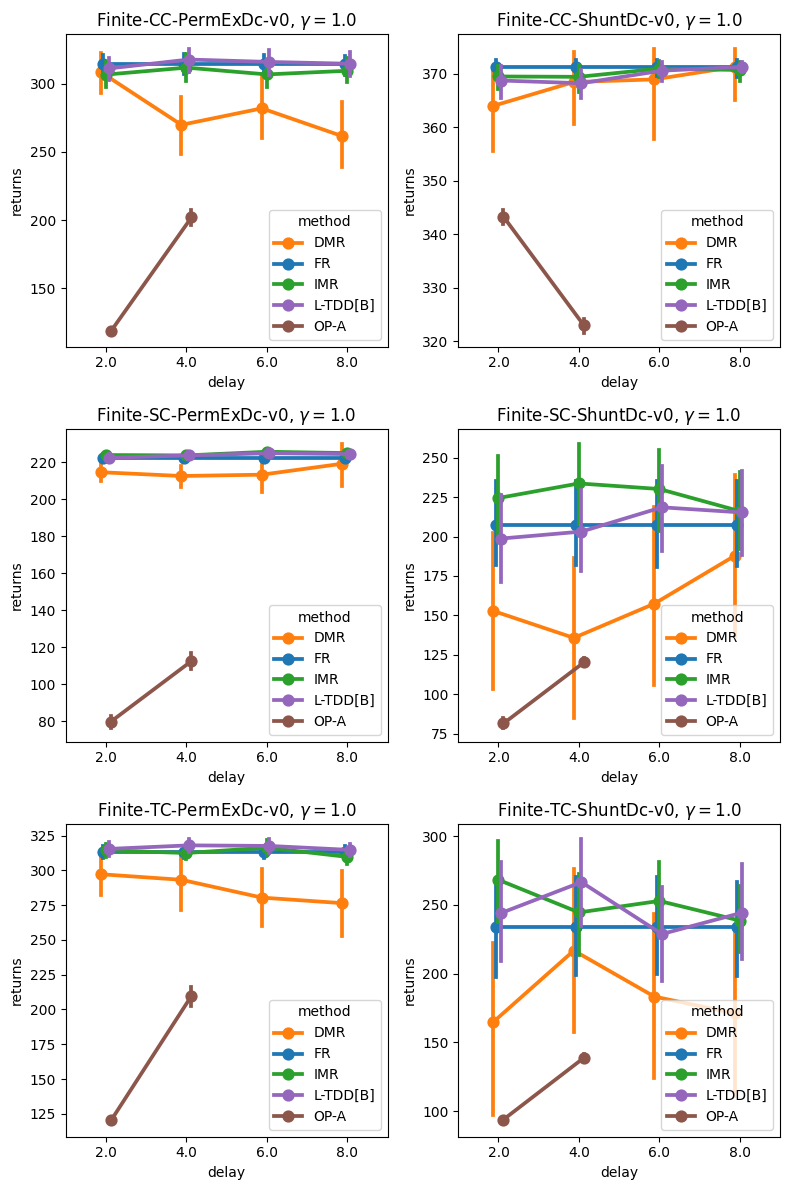

In [65]:
plot_return_ci(df_metrics, gamma=1.0, suffix="sarsa")

{'delay_type': 'clipped-poisson', 'delay_mu': 8.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 6.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 2.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 4.0}


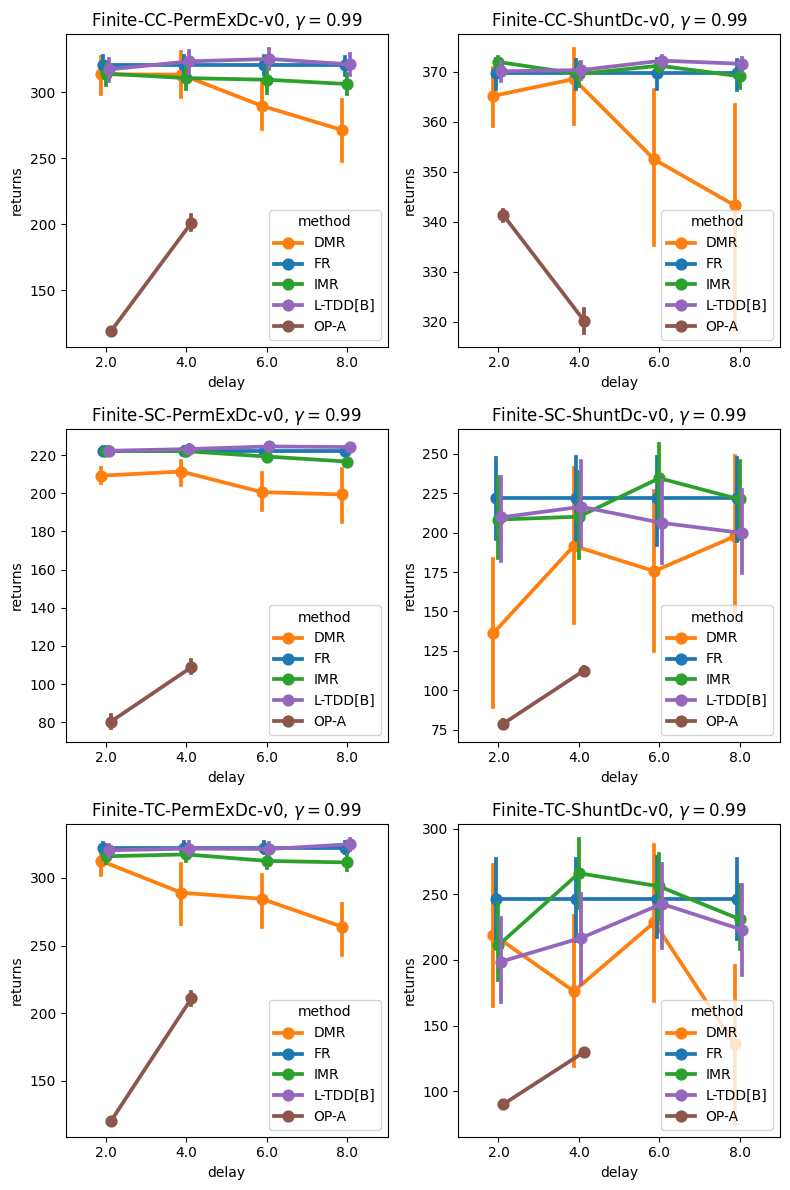

In [66]:
plot_return_ci(df_metrics, gamma=0.99, suffix="sarsa")

## Sample distributions

In [67]:
def plot_sample_dist(df_data, num_samples: int = 2):
    df_slice = max_episode_filter(df_data)
    df_slice = df_slice[["method", "meta", "returns"]]
    df_raw = copy.deepcopy(df_slice)
    methods = sorted(df_raw["method"].unique())
    
    fig, axes = plt.subplots(
        nrows=len(methods), ncols=num_samples, figsize=(4*num_samples, 4*len(methods)),
    )
    for row, method in enumerate(methods):
        df_algomethod = df_raw[
            (df_raw["method"] == method)
        ]
        df_samples = df_algomethod.sample(n=num_samples)
        for idx in range(num_samples):
            ax = axes[row, idx]
            sample = df_samples.iloc[idx]
            miu = np.round(np.mean(sample["returns"]), decimals=2)
            sns.histplot(sample["returns"], ax=ax)
            title_template = " ".join([
                method,
                "$\mu$ =", str(miu),
            ])
            ax.set_title(title_template)

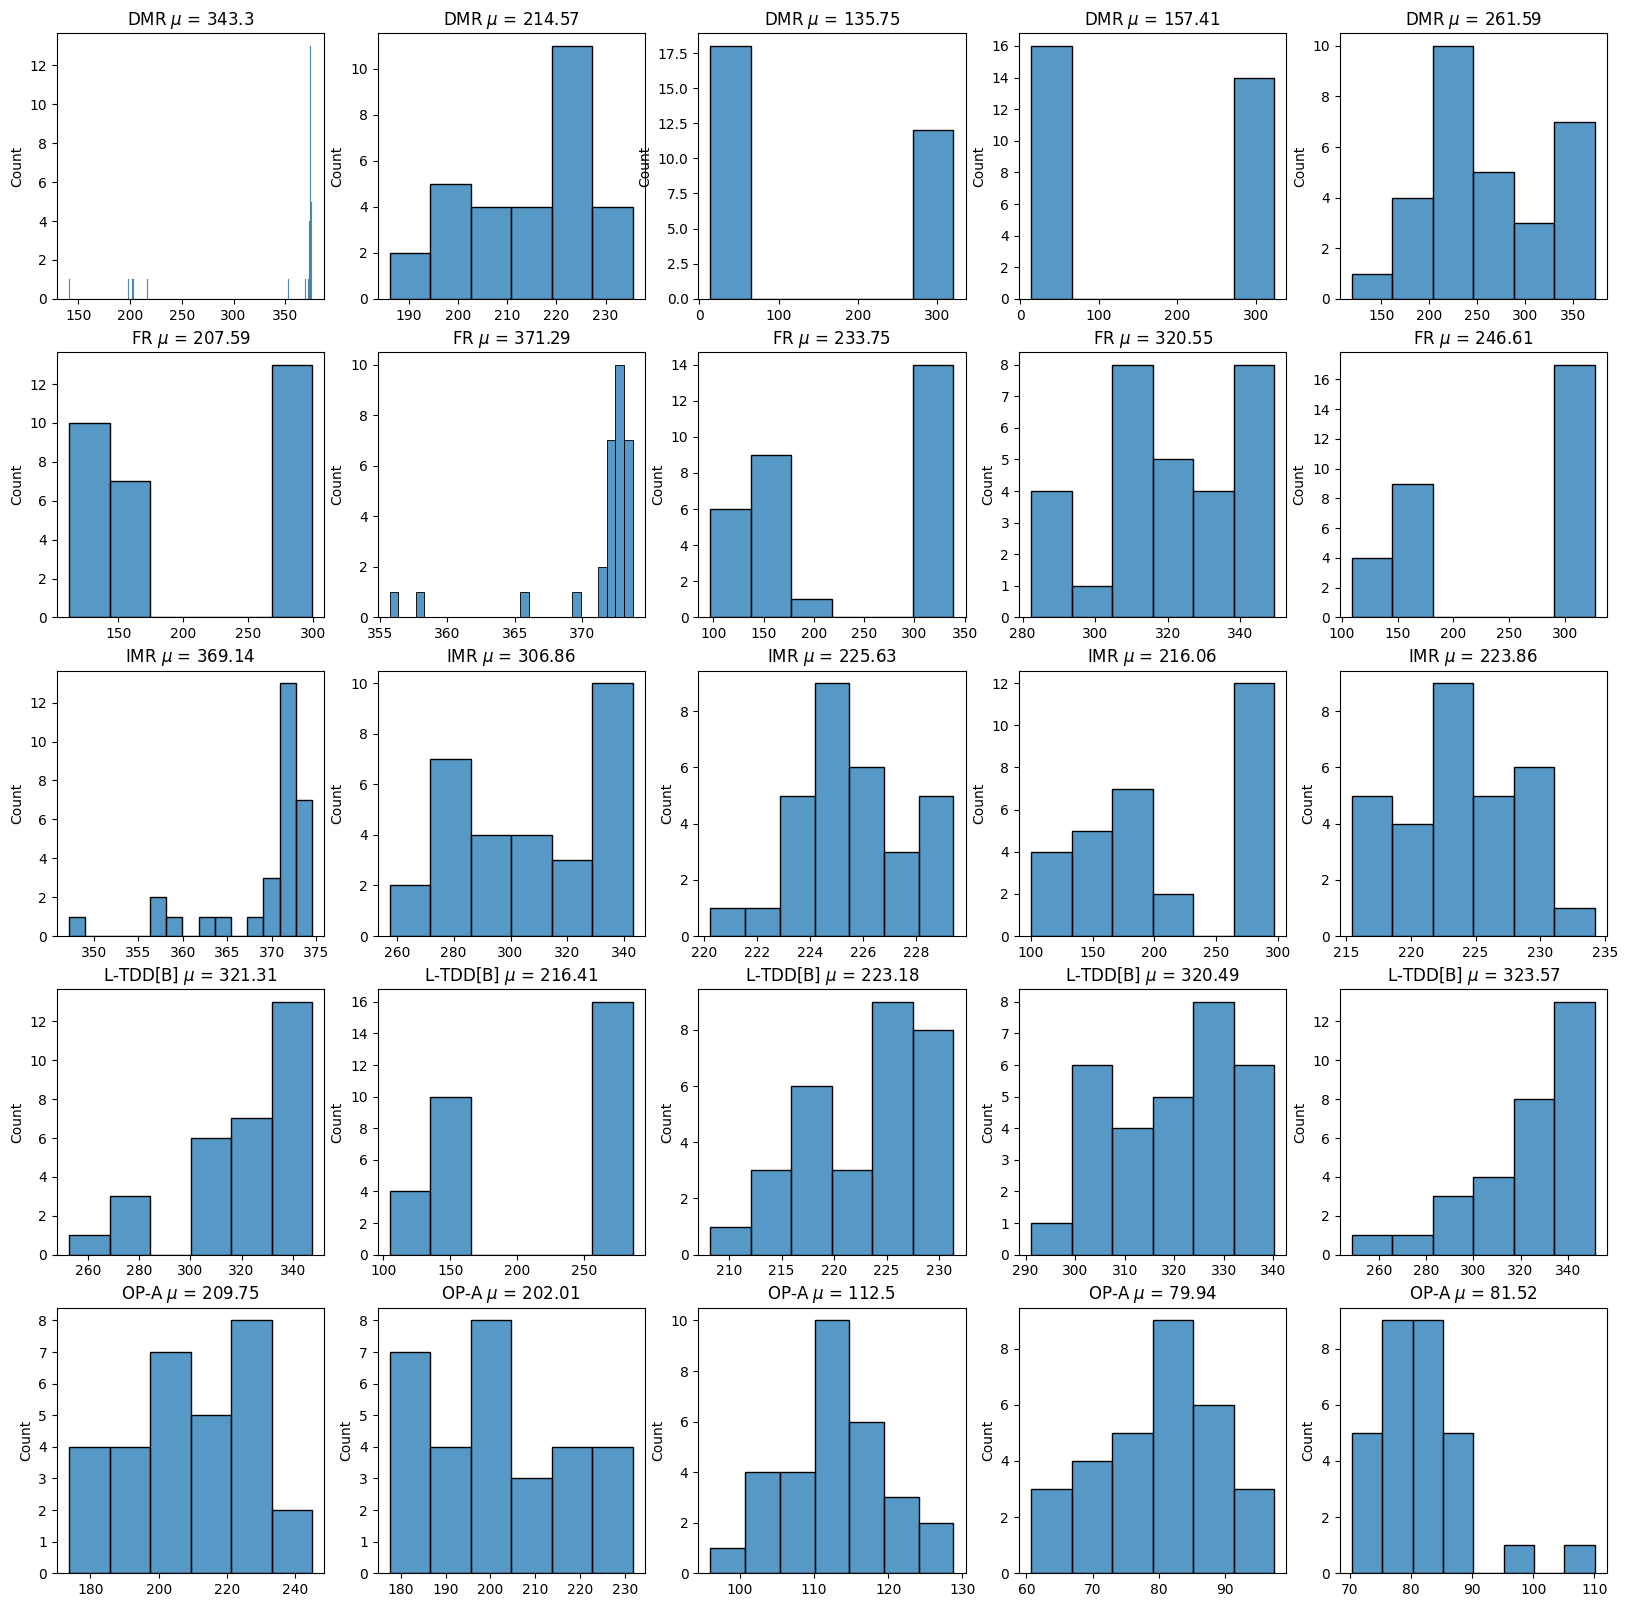

In [68]:
plot_sample_dist(df_metrics, 5)